In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
data= pd.read_csv('/content/drive/MyDrive/DAInternship/cars_ds_final.csv',index_col=0)

In [3]:
data.describe()

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Data columns (total 140 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Make                                       object 
 1    Model                                      object 
 2    Variant                                    object 
 3    Ex-Showroom_Price                          object 
 4    Displacement                               object 
 5    Cylinders                                  float64
 6    Valves_Per_Cylinder                        float64
 7    Drivetrain                                 object 
 8    Cylinder_Configuration                     object 
 9    Emission_Norm                              object 
 10   Engine_Location                            object 
 11   Fuel_System                                object 
 12   Fuel_Tank_Capacity                         object 
 13   Fuel_Type                           

In [5]:
data.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

In [6]:
data.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(1276, 140)

In [8]:
duplicates = data.duplicated().sum()
print(duplicates)

9


In [9]:
data=data.drop_duplicates()

In [10]:
data.shape

(1267, 140)

In [11]:
uniquemake=data['Make'].unique()
print(uniquemake)

['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia'
 'Land Rover Rover' 'Mitsubishi' 'Maruti Suzuki R']


In [12]:
data.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

In [13]:
row_size = data.shape[0]
for i in data.columns:
  if data[i].isnull().sum() > 0:
    print(i,"----------",(data[i].isnull().sum()/row_size) * 100)

Make ---------- 5.919494869771113
Displacement ---------- 0.9471191791633782
Cylinders ---------- 5.209155485398579
Valves_Per_Cylinder ---------- 8.050513022888714
Drivetrain ---------- 0.5524861878453038
Cylinder_Configuration ---------- 1.0260457774269929
Emission_Norm ---------- 0.8681925808997633
Engine_Location ---------- 3.3938437253354383
Fuel_System ---------- 0.6314127861089187
Fuel_Tank_Capacity ---------- 5.445935280189424
Height ---------- 0.07892659826361484
Width ---------- 0.9471191791633782
Body_Type ---------- 0.4735595895816891
Doors ---------- 0.31570639305445936
City_Mileage ---------- 43.72533543804262
Highway_Mileage ---------- 62.50986582478295
ARAI_Certified_Mileage ---------- 8.997632202052092
ARAI_Certified_Mileage_for_CNG ---------- 97.86898184688239
Kerb_Weight ---------- 28.808208366219418
Gears ---------- 8.287292817679557
Ground_Clearance ---------- 22.80978689818469
Front_Brakes ---------- 1.973164956590371
Rear_Brakes ---------- 1.973164956590371
Front

In [14]:
data.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1238
Heads-Up_Display     1216
Welcome_Lights       1198
Battery              1254
Electric_Range       1250
Length: 140, dtype: int64

In [15]:
data[data['Make'].isna()]

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
252,NaN,Mercedes-Benz B-Class,B 180 Sport,"Rs. 29,88,311",1595 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
253,NaN,Mercedes-Benz B-Class,B 200 Cdi Sport,"Rs. 30,89,851",2143 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
254,NaN,Mercedes-Benz B-Class,B 180 Night Edition,"Rs. 31,98,662",1595 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
255,NaN,Mercedes-Benz B-Class,B 200 Cdi Night Edition,"Rs. 33,03,282",2143 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
256,NaN,Mercedes-Benz Cla-Class,200 Sport,"Rs. 35,99,000",1991 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,NaN,Mercedes-Benz Gla-Class,45 Aero Edition,"Rs. 80,67,000",1991 cc,4.0,4.0,4WD,In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1219,NaN,Rolls-Royce Phantom,Sedan,"Rs. 9,50,00,000",6749 cc,12.0,4.0,RWD (Rear Wheel Drive),V,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1220,NaN,Rolls-Royce Phantom,Ewb,"Rs. 7,54,00,000",6749 cc,12.0,4.0,RWD (Rear Wheel Drive),V,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1251,NaN,Mercedes-Benz Glc,200 Progressive,"Rs. 52,75,000",1991 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,...,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN


In [16]:
data.loc[data['Model'].str.contains('Mercedes- Benz Glc', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Rolls-Royce Phantom', na=False) & data['Make'].isnull(), 'Make'] = 'Rolls-Royce'
data.loc[data['Model'].str.contains('Bentley Continental', na=False) & data['Make'].isnull(), 'Make'] = 'Bentley'
data.loc[data['Model'].str.contains('Mercedes- Benz Cls', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes- Benz Sls', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes- Benz Els', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Gla-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Sls-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Cls-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Glc', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz B-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz E-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz C-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz S-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz M-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz A-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Gle', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Cls-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Cla-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Gls', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Amg-Gt', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz G-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Gl', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz V-Class ', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Cls', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz V-Class', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Amg Gt 4-Door Coupe', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Amg Gt 2-Door Coupe', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Mercedes-Benz Maybach', na=False) & data['Make'].isnull(), 'Make'] = 'Mercedes'
data.loc[data['Model'].str.contains('Rolls-Royce Ghost Series Ii	', na=False) & data['Make'].isnull(), 'Make'] = 'Rolls-Royce'
data.loc[data['Model'].str.contains('Rolls-Royce Ghost', na=False) & data['Make'].isnull(), 'Make'] = 'Rolls-Royce'
data.loc[data['Model'].str.contains('Rolls-Royce Ghost Series', na=False) & data['Make'].isnull(), 'Make'] = 'Rolls-Royce'
data.loc[data['Model'].str.contains('Rolls-Royce Ghost Series II', na=False) & data['Make'].isnull(), 'Make'] = 'Rolls-Royce'
data.loc[data['Model'].str.contains('Go+', na=False) & data['Make'].isnull(), 'Make'] = 'Datson'
data.loc[data['Model'].str.contains('Rolls-Royce Wraith', na=False) & data['Make'].isnull(), 'Make'] = 'Rolls-Royce'
data.loc[data['Model'].str.contains('Rolls-Royce Cullinan', na=False) & data['Make'].isnull(), 'Make'] = 'Rolls-Royce'
data.loc[data['Model'].str.contains('Rolls-Royce Dawn', na=False) & data['Make'].isnull(), 'Make'] = 'Rolls-Royce'
data.loc[data['Model'].str.contains('Rolls-Royce Drophead Coupe', na=False) & data['Make'].isnull(), 'Make'] = 'Rolls-Royce'





















In [17]:
data.isnull().sum()

Make                    0
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1238
Heads-Up_Display     1216
Welcome_Lights       1198
Battery              1254
Electric_Range       1250
Length: 140, dtype: int64

In [18]:
row_size = data.shape[0]
for i in data.columns:
    if i != 'ARAI_Certified_Mileage_for_CNG':
        if data[i].isnull().sum() * 100 / row_size > 70:
            data.drop(columns=[i], inplace=True)

In [19]:
data.shape

(1267, 116)

In [ ]:
data[data['Displacement'].isna()]

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
615,Mahindra,E2O Plus,P4,"Rs. 8,81,425",NaN,NaN,NaN,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210 ampere-hour,110 km/full charge
616,Mahindra,E2O Plus,P6,"Rs. 9,57,177",NaN,NaN,NaN,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210 ampere-hour,110 km/full charge
617,Tata,Tigor Ev,Xm+,"Rs. 9,60,868",NaN,2.0,NaN,FWD (Front Wheel Drive),NaN,BS VI,...,NaN,NaN,M1 Category,NaN,NaN,NaN,NaN,NaN,"21.5 kWh,Battery Placed Under Rear Seats",213 km/full charge
618,Tata,Tigor Ev,Xt+,"Rs. 9,75,868",NaN,2.0,NaN,FWD (Front Wheel Drive),NaN,BS VI,...,NaN,NaN,M1 Category,NaN,NaN,NaN,NaN,NaN,"21.5 kWh,Battery Placed Under Rear Seats",213 km/full charge
619,Tata,Tigor Ev,Xe+,"Rs. 9,44,175",NaN,2.0,NaN,FWD (Front Wheel Drive),NaN,BS VI,...,NaN,NaN,M1 Category,NaN,NaN,NaN,NaN,NaN,"21.5 kWh,Battery Placed Under Rear Seats",213 km/full charge
745,Mg,Zs Ev,Excite,"Rs. 20,88,000",NaN,4.0,NaN,RWD (Rear Wheel Drive),In-line,BS 6,...,Yes,Yes,NaN,Yes,Yes,NaN,Yes,NaN,"44.5 (kWh), Lithium Ion",340 km/full charge
746,Mg,Zs Ev,Exclusive,"Rs. 23,58,000",NaN,4.0,NaN,RWD (Rear Wheel Drive),In-line,BS 6,...,Yes,Yes,NaN,Yes,Yes,NaN,Yes,NaN,"44.5 (kWh), Lithium Ion",340 km/full charge
862,Mercedes,Mercedes-Benz Amg Gt 4-Door Coupe,63 S 4Matic+,"Rs. 2,42,00,000",NaN,8.0,6.0,AWD (All Wheel Drive),V,BS 6,...,NaN,NaN,Biturbo engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,Tata,Nexon Ev,Xm,"Rs. 13,99,000",NaN,2.0,NaN,FWD (Front Wheel Drive),In-line,BS VI,...,NaN,NaN,NaN,Yes,NaN,NaN,Yes,NaN,"30.2 kWh* Advanced Li-ion polymer, liquid cool...",312 km/full charge
1007,Tata,Nexon Ev,Xz Plus,"Rs. 14,99,000",NaN,2.0,NaN,FWD (Front Wheel Drive),In-line,BS VI,...,NaN,NaN,NaN,Yes,NaN,NaN,Yes,NaN,"30.2 kWh* Advanced Li-ion polymer, liquid cool...",312 km/full charge


In [ ]:
data['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls-Royce', 'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Datson', 'Mitsubishi', 'Maruti Suzuki R'],
      dtype=object)

In [20]:
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].replace(r'\D', '', regex=True)


data.rename(columns={'Ex-Showroom_Price': 'Ex-Showroom_Price_INR'}, inplace=True)


data['Ex-Showroom_Price_INR'] = data['Ex-Showroom_Price_INR'].astype(int)

In [21]:
data['Displacement'] = data['Displacement'].replace(r'\D', '', regex=True)

# Rename the cleaned column to 'Displacement_cc'
data.rename(columns={'Displacement': 'Displacement_cc'}, inplace=True)

# Convert 'Displacement_cc' column to float type
data['Displacement_cc'] = data['Displacement_cc'].astype(float)

In [22]:
data[['Ex-Showroom_Price_INR','Displacement_cc']]

,Ex-Showroom_Price_INR,Displacement_cc
0,292667,624.0
1,236447,624.0
2,296661,624.0
3,334768,624.0
4,272223,624.0
...,...,...
1271,1302000,1498.0
1272,1421000,1498.0
1273,1431000,1497.0
1274,1201000,1497.0


In [24]:
data['Cylinders'] = data['Cylinders'].astype(float)
data['Valves_Per_Cylinder'] = data['Valves_Per_Cylinder'].astype(float)

In [25]:
data[['Cylinders','Valves_Per_Cylinder']]

,Cylinders,Valves_Per_Cylinder
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,2.0,2.0
...,...,...
1271,4.0,4.0
1272,4.0,4.0
1273,4.0,4.0
1274,4.0,4.0


In [26]:
data['Drivetrain'] = data['Drivetrain'].str.replace(r'\(Rear Wheel Drive\)', '', regex=True)
data['Drivetrain'] = data['Drivetrain'].str.replace(r'\(Front Wheel Drive\)', '', regex=True)
data['Drivetrain'] = data['Drivetrain'].str.replace(r'\(All Wheel Drive\)', '', regex=True)

In [27]:
data['Drivetrain'].unique()

array(['RWD ', 'FWD ', 'AWD ', '4WD', nan], dtype=object)

In [28]:
data['Emission_Norm'].unique()

array(['BS IV', 'BS 6', nan, 'BS III', 'BS VI'], dtype=object)

In [29]:
#to make emission norm consistency
data['Emission_Norm'] = data['Emission_Norm'].str.replace('BS 6', 'BS VI')
data['Emission_Norm'].unique()

array(['BS IV', 'BS VI', nan, 'BS III'], dtype=object)

In [30]:
data['Engine_Location'].unique()

array(['Rear, Transverse', 'Front, Transverse', 'Front, Longitudinal',
       nan, 'Rear Mid, Transverse', 'Mid, Longitudinal',
       'Mid, Transverse', 'Rear, Longitudinal'], dtype=object)

In [31]:
#to make engine_location consistency
data['Engine_Location'] = data['Engine_Location'].str.replace(',', '-')
data['Engine_Location'].unique()


array(['Rear- Transverse', 'Front- Transverse', 'Front- Longitudinal',
       nan, 'Rear Mid- Transverse', 'Mid- Longitudinal',
       'Mid- Transverse', 'Rear- Longitudinal'], dtype=object)

In [32]:
data['Fuel_Tank_Capacity']

0       24 litres
1       24 litres
2       15 litres
3       24 litres
4       24 litres
          ...    
1271    40 litres
1272    40 litres
1273    40 litres
1274    40 litres
1275    88 litres
Name: Fuel_Tank_Capacity, Length: 1267, dtype: object

In [42]:
data['Fuel_Tank_Capacity_L']
data['Fuel_Tank_Capacity_L'] = data['Fuel_Tank_Capacity_L'].astype(float)
data['Fuel_Tank_Capacity_L']

0       24.0
1       24.0
2       15.0
3       24.0
4       24.0
        ... 
1271    40.0
1272    40.0
1273    40.0
1274    40.0
1275    88.0
Name: Fuel_Tank_Capacity_L, Length: 1267, dtype: float64

In [44]:
data[['Height', 'Length', 'Width', 'Kerb_Weight', 'Ground_Clearance']]

,Height,Length,Width,Kerb_Weight,Ground_Clearance
0,1652 mm,3164 mm,1750 mm,660 kg,180 mm
1,1652 mm,3164 mm,1750 mm,725 kg,180 mm
2,1652 mm,3164 mm,1750 mm,710 kg,180 mm
3,1652 mm,3164 mm,1750 mm,725 kg,180 mm
4,1652 mm,3164 mm,1750 mm,725 kg,180 mm
...,...,...,...,...,...
1271,1495 mm,4440 mm,1695 mm,1170 kg,165 mm
1272,1495 mm,4440 mm,1695 mm,1175 kg,165 mm
1273,1495 mm,4440 mm,1695 mm,1107 kg,165 mm
1274,1495 mm,4440 mm,1695 mm,1080 kg,165 mm


In [45]:
data['Height'] = data['Height'].replace(r'\D', '', regex=True)
data['Length'] = data['Length'].replace(r'\D', '', regex=True)
data['Width'] = data['Width'].replace(r'\D', '', regex=True)
data['Kerb_Weight'] = data['Kerb_Weight'].replace(r'\D', '', regex=True)
data['Ground_Clearance'] = data['Ground_Clearance'].replace(r'\D', '', regex=True)

In [48]:
data['Length']=data['Length'].astype(float)
data['Width']=data['Width'].astype(float)
data['Kerb_Weight']=data['Kerb_Weight'].astype(float)
data['Ground_Clearance']=data['Ground_Clearance'].astype(float)
data['Height']=data['Height'].astype(float)

In [49]:
data[['Height', 'Length', 'Width', 'Kerb_Weight', 'Ground_Clearance']]

,Height,Length,Width,Kerb_Weight,Ground_Clearance
0,1652.0,3164.0,1750.0,660.0,180.0
1,1652.0,3164.0,1750.0,725.0,180.0
2,1652.0,3164.0,1750.0,710.0,180.0
3,1652.0,3164.0,1750.0,725.0,180.0
4,1652.0,3164.0,1750.0,725.0,180.0
...,...,...,...,...,...
1271,1495.0,4440.0,1695.0,1170.0,165.0
1272,1495.0,4440.0,1695.0,1175.0,165.0
1273,1495.0,4440.0,1695.0,1107.0,165.0
1274,1495.0,4440.0,1695.0,1080.0,165.0


In [50]:
data['Gears'] = data['Gears'].replace({'Single Speed Reduction Gear': '1', '7 Dual Clutch': '7'})
data['Gears'] = data['Gears'].astype(float)

# Display the count of each unique value in the updated 'Gears' column
data['Gears'].value_counts()

Gears
5.0    614
6.0    224
8.0    139
7.0    138
9.0     30
4.0     16
1.0      1
Name: count, dtype: int64

In [51]:
data['Body_Type'] = data['Body_Type'].str.replace(', ', '-')
data['Body_Type'].unique()

array(['Hatchback', 'MPV', 'MUV', 'SUV', 'Sedan', 'Crossover', nan,
       'Coupe', 'Convertible', 'Sports-Hatchback', 'Sedan-Coupe',
       'Sports', 'Crossover-SUV', 'SUV-Crossover', 'Sedan-Crossover',
       'Sports-Convertible', 'Pick-up', 'Coupe-Convertible'], dtype=object)

In [52]:
data['ARAI_Certified_Mileage'].isnull().sum()

114

In [53]:
data.loc[data['Fuel_Type'] != 'CNG', 'ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].fillna(data['Highway_Mileage'])

In [54]:
data['ARAI_Certified_Mileage'].unique()

array(['23.6 km/litre', nan, '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23 km/litre', '23.01 km/litre', '24.04 km/litre',
       '15 km/litre', '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27.3 km/li

In [55]:
data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].str.replace(r'\s*km/litre', '', regex=True)
data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].str.replace('9.8-10.0', '10.0')
data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].str.replace('22.4-21.9', '22.4')
data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].str.replace(r'\s*kmpl', '', regex=True)

data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].astype(float)


data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].replace(142.0, 14.2)
data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].replace(1449.0, 14.49)

In [57]:
data.rename(columns={'ARAI_Certified_Mileage': 'ARAI_Certified_Mileage_KMPL'}, inplace=True)
data['ARAI_Certified_Mileage_KMPL']

0       23.60
1       23.60
2         NaN
3       21.90
4       23.60
        ...  
1271    25.10
1272    25.10
1273    22.60
1274    17.80
1275    11.56
Name: ARAI_Certified_Mileage_KMPL, Length: 1267, dtype: float64

In [58]:
data['ARAI_Certified_Mileage_for_CNG'].unique()

array([nan, '36 km/kg', '20 km/kg', '32.26 km/kg', '31.76 km/kg',
       '30.48 km/kg', '25 km/kg', '26.6 km/kg', '20.5 km/kg',
       '20.4 km/kg', '43 km/kg', '31.79 km/kg', '18.9 km/kg',
       '14.16 km/kg', '13.96 km/kg', '10.8 km/kg', '33.54 km/kg'],
      dtype=object)

In [59]:
data['ARAI_Certified_Mileage_for_CNG'] = data['ARAI_Certified_Mileage_for_CNG'].str.replace(r'\s*km/kg', '', regex=True)
data['ARAI_Certified_Mileage_for_CNG'] = data['ARAI_Certified_Mileage_for_CNG'].astype(float)

In [60]:
data.rename(columns={'ARAI_Certified_Mileage_for_CNG': 'ARAI_Certified_Mileage_for_CNG_kmpkg'}, inplace=True)
data['ARAI_Certified_Mileage_for_CNG_kmpkg']

0        NaN
1        NaN
2       36.0
3        NaN
4        NaN
        ... 
1271     NaN
1272     NaN
1273     NaN
1274     NaN
1275     NaN
Name: ARAI_Certified_Mileage_for_CNG_kmpkg, Length: 1267, dtype: float64

In [61]:
data['ARAI_Certified_Mileage_KMPL'].fillna(data['ARAI_Certified_Mileage_for_CNG_kmpkg'], inplace=True)

In [62]:
data.drop(columns=['City_Mileage', 'Highway_Mileage','ARAI_Certified_Mileage_for_CNG_kmpkg'], inplace=True)

In [63]:
data['ARAI_Certified_Mileage_KMPL']

0       23.60
1       23.60
2       36.00
3       21.90
4       23.60
        ...  
1271    25.10
1272    25.10
1273    22.60
1274    17.80
1275    11.56
Name: ARAI_Certified_Mileage_KMPL, Length: 1267, dtype: float64

In [64]:
data['Front_Suspension'].unique()

array(['Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar',
       'Double Pivot Arm',
       'Mac Pherson strut with Lower Transverse link, coil spring',
       'MacPherson Struts With Lower Transverse Links',
       'McPherson struts', 'McPherson Strut',
       'Gas Filled Mc Pherson Strut',
       'MacPherson Strut with anti-roll bar',
       'Macpherson strut with Coil Spring', nan, 'Mc Pherson Strut',
       'MacPherson Strut', 'Mc Pherson Struct',
       'Independent, Lower Wishbone, Mcpherson Strut with coil spring',
       'Independent Lower Wishbone, McPherson Strut with coil Spring',
       'McPherson strut & coil spring', 'Mc Pherson-strut',
       'Dual-path McPherson strut with coil spring and anti-roll bar',
       'McPherson strut with coil spring',
       'McPherson strut with stabiliser bar',
       'MacPherson Strut with Staboilizer Bar', 'Independent McPherson',
       'Independent McPherson strut with Coil spring & Anti-roll bar'

In [65]:
data.loc[data['Front_Suspension'].str.contains('MacPherson|Mac Pherson|Mc Pherson|McPherson|Macpherson|Mcpherson', na=False), 'Front_Suspension'] = 'MacPherson Suspension'
data.loc[data['Front_Suspension'].str.contains('Double Wishbone|Double wishbone|double-wishbone|double wishbone|Double wish-bone', na=False), 'Front_Suspension'] = 'Double Wishbone Suspension'
data.loc[data['Front_Suspension'].str.contains('link|Link', na=False), 'Front_Suspension'] = 'Multi Link Suspension'
data.loc[data['Front_Suspension'].str.contains('Adaptive|adaptive', na=False), 'Front_Suspension'] = 'Adaptive Suspension'
data.loc[data['Front_Suspension'].str.contains('Leaf spring|leaf spring|Leaf Spring', na=False), 'Front_Suspension'] = 'Leaf Spring Suspension'
data.loc[data['Front_Suspension'].str.contains('Air|air|AIRMATIC', na=False), 'Front_Suspension'] = 'Air Suspension'
data.loc[data['Front_Suspension'].str.contains('Damper|damper|damping|CONTROL', na=False), 'Front_Suspension'] = 'Damper Suspension'
data.loc[data['Front_Suspension'].str.contains('Independent|independent', na=False), 'Front_Suspension'] = 'Independent Suspension'
data.loc[data['Front_Suspension'].str.contains('Double joint|Double-Joint', na=False), 'Front_Suspension'] = 'Double Joint Suspension'
data.loc[data['Front_Suspension'].str.contains('single joint ', na=False), 'Front_Suspension'] = 'Single Joint Suspension'
data.loc[~data['Front_Suspension'].str.contains('MacPherson|Double Wishbone|Multi Link|Adaptive|Leaf Spring|Air|Damper|Independent|Double', na=False), 'Front_Suspension'] = 'Aluminium Suspension'

In [66]:
data['Front_Suspension'].unique()

array(['MacPherson Suspension', 'Double Pivot Arm',
       'Aluminium Suspension', 'Independent Suspension',
       'Double Wishbone Suspension', 'Multi Link Suspension',
       'Adaptive Suspension', 'Damper Suspension', 'Air Suspension',
       'Leaf Spring Suspension',
       'Hydraulic Double Acting, Telescopic Shock Absorber',
       'Double Joint Suspension'], dtype=object)

In [67]:
data['Rear_Suspension'].unique()

array(['Independent, Semi Trailing arm with coil spring & gas filled shock absorbers',
       'H-type Torsion Beam', 'Twist beam suspension with coil spring',
       '3 Link Rigid', '3-link rigid axle Suspension',
       'Coupled Torsion Beam Axle with coil spring', nan,
       'Coupled Torsion Beam Axle',
       'Semi-Independent; Twist beam with dual path strut',
       'Rear Twist beam with coil spring mounted on hydraulic shock absorbers',
       'Torsion Beam', 'Torison Beam', '5 rods system',
       'Twist Beam with Coil spring and Shock Absorber',
       'Semi-independent trailing arm',
       'Semi-independent twist beam with twin gas and oil filled shock absorbers',
       'Semi Independent, Twist Beam with coil Spring and Shock Absorber',
       'Semi Independent Trailing Arm',
       'H-Section torsion beam with programmed deflection-coil spring - See more at: http://mahindraverito.com/verito-specs.aspx#sthash.hu39n454.dpuf',
       'H-Section torsion beam with programmed de

In [68]:
data.loc[data['Rear_Suspension'].str.contains('multi-link|multilink', case=False, na=False), 'Rear_Suspension'] = 'Multi-link Suspension'
data.loc[data['Rear_Suspension'].str.contains('torsion beam|torsion bar', case=False, na=False), 'Rear_Suspension'] = 'Torsion Beam Suspension'
data.loc[data['Rear_Suspension'].str.contains('double wishbone|wishbone', case=False, na=False), 'Rear_Suspension'] = 'Double Wishbone Suspension'
data.loc[data['Rear_Suspension'].str.contains('coil spring|coil-over|coilover', case=False, na=False), 'Rear_Suspension'] = 'Coil Spring Suspension'
data.loc[data['Rear_Suspension'].str.contains('independent|macpherson|mcpherson', case=False, na=False), 'Rear_Suspension'] = 'Independent Suspension'
data.loc[data['Rear_Suspension'].str.contains('leaf spring|leaf-sprung|leafsprung', case=False, na=False), 'Rear_Suspension'] = 'Leaf Spring Suspension'
data.loc[~data['Rear_Suspension'].str.contains('Multi-link|Torsion Beam|Double Wishbone|Coil Spring|Independent|Leaf Spring', case=False, na=False), 'Rear_Suspension'] = 'Other Suspension'

In [69]:
data['Rear_Suspension'].unique()

array(['Coil Spring Suspension', 'Torsion Beam Suspension',
       'Other Suspension', 'Independent Suspension',
       'Multi-link Suspension', 'Double Wishbone Suspension',
       'Leaf Spring Suspension'], dtype=object)

In [70]:
data[['Front_Track', 'Rear_Track']]

,Front_Track,Rear_Track
0,1325 mm,1315 mm
1,1325 mm,1315 mm
2,1325 mm,1315 mm
3,1325 mm,1315 mm
4,1325 mm,1315 mm
...,...,...
1271,1475 mm,1465 mm
1272,1475 mm,1465 mm
1273,1475 mm,1465 mm
1274,1490 mm,1480 mm


In [71]:
data['Front_Track'] = data['Front_Track'].replace(r'\D', '', regex=True)
data['Rear_Track'] = data['Rear_Track'].replace(r'\D', '', regex=True)

In [72]:
data['Front_Track'] = data['Front_Track'].astype(float)
data['Rear_Track'] = data['Rear_Track'].astype(float)

In [73]:
data[['Front_Track', 'Rear_Track']]

,Front_Track,Rear_Track
0,1325.0,1315.0
1,1325.0,1315.0
2,1325.0,1315.0
3,1325.0,1315.0
4,1325.0,1315.0
...,...,...
1271,1475.0,1465.0
1272,1475.0,1465.0
1273,1475.0,1465.0
1274,1490.0,1480.0


In [74]:
data.rename(columns={'Front_Track': 'Front_Track_mm','Rear_Track': 'Rear_Track_mm'}, inplace=True)

In [76]:
data[['Front_Track_mm','Rear_Track_mm']]

,Front_Track_mm,Rear_Track_mm
0,1325.0,1315.0
1,1325.0,1315.0
2,1325.0,1315.0
3,1325.0,1315.0
4,1325.0,1315.0
...,...,...
1271,1475.0,1465.0
1272,1475.0,1465.0
1273,1475.0,1465.0
1274,1490.0,1480.0


In [78]:
data['Front_Tyre_&_Rim'] = data['Front_Tyre_&_Rim'].str.replace(' ','',regex=False)

In [79]:
data[['F_Tire_Width', 'F_Tire']] = data['Front_Tyre_&_Rim'].str.split('/', n=1, expand=True)
data[['F_Tire_Aspect_Ratio', 'F_Tire_Diameter']] = data['F_Tire'].str.split('R', n=1, expand=True)

f_drop = ['F_Tire']
data.drop(columns=f_drop, inplace=True)
data['F_Tire_Width'] = data['F_Tire_Width'].replace({'155R13LT':'155','(245':'245','R12':np.nan,'R16':np.nan,'43.66cm':np.nan,'P215':'215','P235':'235','145R12LT6PR':'145' , '195R15LT,8PRRadial':'195','21565R16':'215'})
data['F_Tire_Aspect_Ratio'] = data['F_Tire_Aspect_Ratio'].replace({'17"LightAlloyWheelsJCWTrackSpoke,Black':'43','35Z':'35','Z':'','40/20':'40','30Z':'30','40Z':'40','60/':'60','45Z':'45','60Z':'60','60V':'60','55Z':'55','155':np.nan,None:np.nan})
data['F_Tire_Diameter'] = data['F_Tire_Diameter'].replace({'15Steel':'15','18TubelessRadials':'18','F20':'20','1794Y':np.nan,None:np.nan})


data['F_Tire_Width'] = data['F_Tire_Width'].astype(float)
data['F_Tire_Aspect_Ratio'] = data['F_Tire_Aspect_Ratio'].astype(float)
data['F_Tire_Diameter'] = data['F_Tire_Diameter'].astype(float)

In [80]:
data['F_Tire_Width'].unique()

array([135.,  80., 155., 165.,  nan, 175., 185., 205., 195., 225., 265.,
       245., 255., 215., 235., 295., 275., 285., 145., 115.])

In [81]:
data['F_Tire_Aspect_Ratio'].unique()

array([ 70.,  nan,  80.,  65.,  60.,  55.,  45.,  35.,  50.,  43.,  40.,
        30.,  75.,  90., 335.,  85.])

In [82]:
data['F_Tire_Diameter'].unique()

array([12., 13., 14., nan, 15., 16., 17., 18., 20., 19., 21., 22.])

In [83]:
data['Rear_Tyre_&_Rim'] = data['Rear_Tyre_&_Rim'].str.replace(' ','', regex=False)
data['Rear_Tyre_&_Rim'].unique()

array(['155/65R12', '80/155R13', '155/80R13', '165/70R14', '155R13LT',
       '155/65R13', '155/70R13', nan, '175/65R14', '175/60R15',
       '175/65R15', '185/65R14', '185/65R15', '205/70R15', '205/70',
       '185/60R15', '165/65R14', '165/80R14', '185/70R14', '195/55R16',
       '175/70R14', '185/60R16', '195/55R15', '175/70R15', '205/55R16',
       '175/65', '225/60R17', '265/60R17', '245/70R17', '255/60R18',
       '215/65R17', '235/55R18', '235/60R18', '215/55R17', '205/55R17',
       '225/45R17', '295/30R20', '215/65R16', '235/55R17', '235/55R19',
       '225/50R1794Y', '43.66cm/17"LightAlloyWheelsJCWTrackSpoke,Black',
       '225/55R18', '225/60R19', '245/50R19', '245/45R18', '245/40R18',
       '255/50R19', '275/40R19', '265/60R18', '265/50R20', '295/45R20',
       '255/35R18', '265/35ZR19', '235/40R18', '275/55R19', '295/40R21',
       '235/60VR18', '265/35R19', '(245/50R18', '275/35R20', '275/50R20',
       '245/45R19', '285/40ZR19', '255/60ZR18', '285/45R21', '255/45R19',
 

In [84]:
data[['R_Tire_Width', 'R_Tire']] = data['Rear_Tyre_&_Rim'].str.split('/', n=1, expand=True)
data[['R_Tire_Aspect_Ratio', 'R_Tire_Diameter']] = data['R_Tire'].str.split('R', n=1, expand=True)

r_drop = ['R_Tire']
data.drop(columns=r_drop, inplace=True)
data['R_Tire_Width'] = data['R_Tire_Width'].replace({'155R13LT':'155','(245':'245','R12':np.nan,'R16':np.nan,'43.66cm':np.nan,'P215':'215','P235':'235','145R12LT6PR':'145' , '195R15LT,8PRRadial':'195','21565R16':'215'})
data['R_Tire_Aspect_Ratio'] = data['R_Tire_Aspect_Ratio'].replace({'17"LightAlloyWheelsJCWTrackSpoke,Black':'43','35/20':'35','25Z':'25','50Z':'50','335':np.nan,'60/':'60','30Z':'30','60Z':'60','40Z':'40','60V':'60','35Z':'35','155':np.nan,None:np.nan})
data['R_Tire_Diameter'] = data['R_Tire_Diameter'].replace({None:np.nan,'1794Y':np.nan,'15Steel':'15','18TubelessRadials':'18','F20':'20'})


data['R_Tire_Width'] = data['R_Tire_Width'].astype(float)
data['R_Tire_Aspect_Ratio'] = data['R_Tire_Aspect_Ratio'].astype(float)
data['R_Tire_Diameter'] = data['R_Tire_Diameter'].astype(float)

In [85]:
data['R_Tire_Width'].unique()

array([155.,  80., 165.,  nan, 175., 185., 205., 195., 225., 265., 245.,
       255., 215., 235., 295., 275., 285., 315., 305., 145., 115., 325.,
       335., 355.])

In [86]:
data['R_Tire_Aspect_Ratio'].unique()

array([65., nan, 80., 70., 60., 55., 45., 30., 50., 43., 40., 35., 75.,
       90., 85., 25.])

In [87]:
data['R_Tire_Diameter'].unique()

array([12., 13., 14., nan, 15., 16., 17., 18., 20., 19., 21., 22.])

In [88]:
data['Power'].head()

0    38PS@5500rpm
1    38PS@5500rpm
2    38PS@5500rpm
3    38PS@5500rpm
4    38PS@5500rpm
Name: Power, dtype: object

In [89]:
data[['Power_PS', 'Power_RPM']] = data['Power'].str.split('@', n=1, expand=True)
data[['Power_PS', 'Power_RPM']].head()

,Power_PS,Power_RPM
0,38PS,5500rpm
1,38PS,5500rpm
2,38PS,5500rpm
3,38PS,5500rpm
4,38PS,5500rpm


In [90]:
data['Power_PS'] = data['Power_PS'].replace(r'[A-Za-z]', '', regex=True)
data['Power_PS'] = data['Power_PS'].astype(float)

In [93]:
data['Power_RPM'] = data['Power_RPM'].replace(r'[A-Za-z]', '', regex=True)


data['Power_RPM'] = data['Power_RPM'].astype(str)

data.loc[data['Power_RPM'].str.contains('-4', case=False, na=False), 'Power_RPM'] = '4000'
data.loc[data['Power_RPM'].str.contains('-6', case=False, na=False), 'Power_RPM'] = '6000'
data.loc[data['Power_RPM'].str.contains('-7', case=False, na=False), 'Power_RPM'] = '7000'

data['Power_RPM'] = data['Power_RPM'].astype(float)

In [94]:
data[['Power_PS', 'Power_RPM']].head()

,Power_PS,Power_RPM
0,38.0,5500.0
1,38.0,5500.0
2,38.0,5500.0
3,38.0,5500.0
4,38.0,5500.0


In [95]:
data['Torque'].head()

0    51Nm@4000rpm
1    51Nm@4000rpm
2    51Nm@4000rpm
3    51Nm@4000rpm
4    51Nm@4000rpm
Name: Torque, dtype: object

In [96]:
data[['Torque_Nm', 'Torque_RPM']] = data['Torque'].str.split('@', n=1, expand=True)
data[['Torque_Nm', 'Torque_RPM']].head()

,Torque_Nm,Torque_RPM
0,51Nm,4000rpm
1,51Nm,4000rpm
2,51Nm,4000rpm
3,51Nm,4000rpm
4,51Nm,4000rpm


In [97]:
data['Torque_Nm'] = data['Torque_Nm'].replace(r'[A-Za-z]', '', regex=True)
data['Torque_Nm'] = data['Torque_Nm'].astype(float)

In [98]:
data['Torque_RPM'] = data['Torque_RPM'].replace(r'[A-Za-z]', '', regex=True)

# Replace specific values and convert to float type
data.loc[data['Torque_RPM'].str.contains('-1', case=False, na=False), 'Torque_RPM'] = '1000'
data.loc[data['Torque_RPM'].str.contains('-2', case=False, na=False), 'Torque_RPM'] = '2000'
data.loc[data['Torque_RPM'].str.contains('-3|- 3', case=False, na=False), 'Torque_RPM'] = '3000'
data.loc[data['Torque_RPM'].str.contains('-4|- 4', case=False, na=False), 'Torque_RPM'] = '4000'
data.loc[data['Torque_RPM'].str.contains('-5|- 5', case=False, na=False), 'Torque_RPM'] = '5000'
data.loc[data['Torque_RPM'].str.contains('-6', case=False, na=False), 'Torque_RPM'] = '6000'

data['Torque_RPM'] = data['Torque_RPM'].astype(float)

In [99]:
data[['Torque_Nm', 'Torque_RPM']].head()

,Torque_Nm,Torque_RPM
0,51.0,4000.0
1,51.0,4000.0
2,51.0,4000.0
3,51.0,4000.0
4,51.0,4000.0


In [100]:
data['Power_Steering'].unique()

array(['Electric Power', nan, 'Yes', 'Hydraulic Power',
       'Electric Power, Hydraulic Power', 'Electro-Hydraulic'],
      dtype=object)

In [101]:
data['Power_Steering'] = data['Power_Steering'].replace({'Electric Power, Hydraulic Power':'Electro-Hydraulic','Yes':'Undefined Powered',np.nan:'Non Powered'})


In [102]:
data['Power_Windows'] = data['Power_Windows'].replace({'Only Front Windows':'Front Windows',np.nan:'Non Powered'})


In [103]:
data.loc[data['Power_Seats'].str.contains('Yes|Power', case=False, na=False), 'Power_Seats'] = 'Powered Seats'
data['Power_Seats'] =data['Power_Seats'].replace(np.nan,'Non Powered')

In [104]:
data.loc[data['Keyless_Entry'].str.contains('Yes|Key|Remote', case=False, na=False), 'Keyless_Entry'] = 'Yes'
data['Keyless_Entry'] = data['Keyless_Entry'].replace(np.nan,'No')

In [106]:
data[['Power_Steering', 'Power_Windows', 'Power_Seats', 'Keyless_Entry']]

,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry
0,Electric Power,Front Windows,Non Powered,Yes
1,Non Powered,Non Powered,Non Powered,No
2,Electric Power,Non Powered,Non Powered,No
3,Electric Power,Front Windows,Non Powered,Yes
4,Electric Power,Non Powered,Non Powered,No
...,...,...,...,...
1271,Electric Power,All Windows,Non Powered,Yes
1272,Electric Power,All Windows,Non Powered,Yes
1273,Electric Power,All Windows,Non Powered,Yes
1274,Electric Power,All Windows,Non Powered,Yes


**Handling,Odometer,Speedometer,Tachometer,Tripmeter,wheelbase,basic-waranty,boot-space,Minimum_Turning_Radius**

In [108]:
data['Odometer'].unique()

array(['Digital', 'Analog', nan, 'Digital, Analog', 'Yes'], dtype=object)

In [109]:
data['Odometer'] = data['Odometer'].replace({'Digital, Analog':'Digi-Analog','Yes':'Unspecified'})


In [110]:
data['Speedometer'] = data['Speedometer'].replace({'Analog, Digital':'Digi-Analog','Digital, Analog':'Digi-Analog','Yes':'Unspecified'})

In [111]:
data.loc[data['Tachometer'].str.contains('Yes|Analog|Digital', case=False, na=False), 'Tachometer'] = 'Yes'
data.loc[data['Tachometer'].str.contains('Not', case=False, na=False), 'Tachometer'] = 'No'
data['Tachometer'] = data['Tachometer'].replace(np.nan,'No')

In [112]:
data['Tripmeter'] = np.where(data['Tripmeter'].notnull(), 'Yes', data['Tripmeter'])


data['Tripmeter'] = data['Tripmeter'].replace(np.nan, 'No')

In [113]:
data['Wheelbase'] = data['Wheelbase'].replace(r'\D', '', regex=True)
data.rename(columns={'Wheelbase': 'Wheelbase_mm'}, inplace=True)
data['Wheelbase_mm'] = data['Wheelbase_mm'].astype(float)

In [114]:
data.drop(columns='Wheels_Size', inplace=True)

In [115]:
data.loc[data['Basic_Warranty'].str.contains('1 Year', na=False), 'Basic_Warranty'] = '1'
data.loc[data['Basic_Warranty'].str.contains('2 years|2 Years|24 months', na=False), 'Basic_Warranty'] = '2'
data.loc[data['Basic_Warranty'].str.contains('3 years|3 Years|3rd years', na=False), 'Basic_Warranty'] = '3'
data.loc[data['Basic_Warranty'].str.contains('4 years', na=False), 'Basic_Warranty'] = '4'
data.loc[data['Basic_Warranty'].str.contains('8 yrs', na=False), 'Basic_Warranty'] = '8'
data.rename(columns={'Basic_Warranty': 'Basic_Warranty_years'}, inplace=True)
data['Basic_Warranty_years'] = data['Basic_Warranty_years'].astype(float)

In [116]:
data['Boot_Space'] = data['Boot_Space'].replace('209(All3RowsUp).550(3rdRowFolded)&803(2ndRowand3rdRowFolded) litres',np.nan)
data['Boot_Space'] = data['Boot_Space'].replace(r'\D', '', regex=True)
data.rename(columns={'Boot_Space': 'Boot_Space_litres'}, inplace=True)
data['Boot_Space_litres'] = data['Boot_Space_litres'].astype(float)

In [117]:
data.drop(columns='Extended_Warranty', inplace=True)

In [118]:
data['Minimum_Turning_Radius'] = data['Minimum_Turning_Radius'].replace(r'\D', '', regex=True)
data.rename(columns={'Minimum_Turning_Radius': 'Minimum_Turning_Radius_meter'}, inplace=True)
data['Minimum_Turning_Radius_meter'] = data['Minimum_Turning_Radius_meter'].astype(float)

In [119]:
data[['Odometer','Speedometer','Tachometer','Tripmeter','Wheelbase_mm','Basic_Warranty_years','Minimum_Turning_Radius_meter']]

,Odometer,Speedometer,Tachometer,Tripmeter,Wheelbase_mm,Basic_Warranty_years,Minimum_Turning_Radius_meter
0,Digital,Analog,No,Yes,2230.0,2.0,4.0
1,Digital,Analog,No,Yes,2230.0,2.0,4.0
2,Digital,Analog,No,Yes,2230.0,2.0,4.0
3,Digital,Analog,No,Yes,2230.0,2.0,4.0
4,Digital,Analog,No,Yes,2230.0,2.0,4.0
...,...,...,...,...,...,...,...
1271,Digital,Analog,Yes,Yes,2600.0,2.0,53.0
1272,Digital,Analog,Yes,Yes,2600.0,2.0,53.0
1273,Digital,Analog,Yes,Yes,2600.0,2.0,53.0
1274,Digital,Analog,Yes,Yes,2600.0,2.0,53.0


In [120]:
for i in data.columns:
  print(i ,'-------', data[i].dtype)

Make ------- object
Model ------- object
Variant ------- object
Ex-Showroom_Price_INR ------- int64
Displacement_cc ------- float64
Cylinders ------- float64
Valves_Per_Cylinder ------- float64
Drivetrain ------- object
Cylinder_Configuration ------- object
Emission_Norm ------- object
Engine_Location ------- object
Fuel_System ------- object
Fuel_Tank_Capacity_L ------- float64
Fuel_Type ------- object
Height ------- float64
Length ------- float64
Width ------- float64
Body_Type ------- object
Doors ------- float64
ARAI_Certified_Mileage_KMPL ------- float64
Kerb_Weight ------- float64
Gears ------- float64
Ground_Clearance ------- float64
Front_Brakes ------- object
Rear_Brakes ------- object
Front_Suspension ------- object
Rear_Suspension ------- object
Front_Track_mm ------- float64
Rear_Track_mm ------- float64
Front_Tyre_&_Rim ------- object
Rear_Tyre_&_Rim ------- object
Power_Steering ------- object
Power_Windows ------- object
Power_Seats ------- object
Keyless_Entry ------- o

In [121]:
data.isnull().sum().sum()

26306

In [122]:
numeric=["int32","float64"]

for j in data.columns:
    if data[j].dtype in numeric:
        if data[j].isnull().sum()>0:
            data[j]=data[j].fillna(data[j].median())

In [124]:
data.isnull().sum().sum()

22164

In [125]:
imp_col = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price_INR', 'Drivetrain', 'Cylinder_Configuration',
 'Emission_Norm', 'Engine_Location', 'Fuel_System', 'Fuel_Type', 'Body_Type', 'Front_Brakes', 'Rear_Brakes',
 'Front_Suspension', 'Rear_Suspension', 'Power_Steering', 'Power_Windows', 'Power_Seats', 'Odometer', 'Speedometer',
 'Seats_Material', 'Type']

In [126]:
for i in imp_col:
    data[i]=data[i].fillna('Not Mentioned')

In [127]:
features = []
for i in data.columns:
    if i not in imp_col:
        if data[i].dtype not in numeric:
            features.append(i)

In [128]:
features[:5]

['Front_Tyre_&_Rim', 'Rear_Tyre_&_Rim', 'Keyless_Entry', 'Power', 'Torque']

In [129]:
for k in features:
    data[k] = np.where(data[k].notnull(), 'Yes', data[k])
    data[k] = data[k].fillna('No')

In [130]:
data.isnull().sum().sum()

0

In [131]:
print(data.dtypes)

Make                      object
Model                     object
Variant                   object
Ex-Showroom_Price_INR      int64
Displacement_cc          float64
                          ...   
R_Tire_Diameter          float64
Power_PS                 float64
Power_RPM                float64
Torque_Nm                float64
Torque_RPM               float64
Length: 121, dtype: object


In [132]:
data.shape

(1267, 121)

**Analysis**

In [133]:
data.head()

,Make,Model,Variant,Ex-Showroom_Price_INR,Displacement_cc,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,F_Tire_Width,F_Tire_Aspect_Ratio,F_Tire_Diameter,R_Tire_Width,R_Tire_Aspect_Ratio,R_Tire_Diameter,Power_PS,Power_RPM,Torque_Nm,Torque_RPM
0,Tata,Nano Genx,Xt,292667,624.0,2.0,2.0,RWD,In-line,BS IV,...,135.0,70.0,12.0,155.0,65.0,12.0,38.0,5500.0,51.0,4000.0
1,Tata,Nano Genx,Xe,236447,624.0,2.0,2.0,RWD,In-line,BS IV,...,135.0,70.0,12.0,155.0,65.0,12.0,38.0,5500.0,51.0,4000.0
2,Tata,Nano Genx,Emax Xm,296661,624.0,2.0,2.0,RWD,In-line,BS IV,...,135.0,70.0,12.0,155.0,65.0,12.0,38.0,5500.0,51.0,4000.0
3,Tata,Nano Genx,Xta,334768,624.0,2.0,2.0,RWD,In-line,BS IV,...,135.0,70.0,12.0,155.0,65.0,12.0,38.0,5500.0,51.0,4000.0
4,Tata,Nano Genx,Xm,272223,624.0,2.0,2.0,RWD,In-line,BS IV,...,135.0,70.0,12.0,155.0,65.0,12.0,38.0,5500.0,51.0,4000.0


In [134]:
data.describe(include=['object'])

,Make,Model,Variant,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Type,Body_Type,...,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
count,1267,1267,1267,1267,1267,1267,1267,1267,1267,1267,...,1267,1267,1267,1267,1267,1267,1267,1267,1267,1267
unique,42,263,1064,5,5,4,8,3,6,18,...,2,2,2,2,2,2,2,2,2,2
top,Maruti Suzuki,Nexon,Lxi,FWD,In-line,BS IV,Front- Transverse,Injection,Petrol,SUV,...,No,No,No,Yes,No,No,No,No,No,No
freq,149,24,9,878,1068,870,796,1255,642,438,...,663,778,645,649,657,798,688,773,833,727


In [140]:

top_car_models = data.groupby(['Make', 'Model'])['Ex-Showroom_Price_INR'].mean().sort_values(ascending=False).head(5)
print("Top Car Models:\n", top_car_models)

Top Car Models:
 Make         Model                     
Bugatti      Chiron                        202149167.0
Rolls-Royce  Rolls-Royce Phantom            85200000.0
             Rolls-Royce Drophead Coupe     83755383.0
             Rolls-Royce Phantom Coupe      77312661.0
             Rolls-Royce Cullinan           69500000.0
Name: Ex-Showroom_Price_INR, dtype: float64


Bugatti Chiron is leading in india

In [141]:
cheap_car_models = data.groupby(['Make', 'Model'])['Ex-Showroom_Price_INR'].mean().sort_values(ascending=True).head(5)
print("cheap Car Models:\n", cheap_car_models)

cheap Car Models:
 Make           Model        
Bajaj          Qute (Re60)      273000.000000
Maruti Suzuki  Omni             283631.500000
Tata           Nano Genx        291263.500000
Maruti Suzuki  Alto 800 Tour    355397.000000
Datsun         Redi-Go          358994.333333
Name: Ex-Showroom_Price_INR, dtype: float64


Bajaj is cheap model in India

In [143]:
popular_fuel_types = data['Fuel_Type'].value_counts().head(5).reset_index()
print("Popular Fuel Types:\n", popular_fuel_types)

Popular Fuel Types:
   Fuel_Type  count
0    Petrol    642
1    Diesel    574
2       CNG     16
3    Hybrid     15
4  Electric     14


In [151]:
fuel_efficiency_analysis = data.groupby('Fuel_Type')['ARAI_Certified_Mileage_KMPL'].mean()
print("Fuel Efficiency Analysis:\n", fuel_efficiency_analysis)

Fuel Efficiency Analysis:
 Fuel_Type
CNG             28.671875
CNG + Petrol    22.323333
Diesel          19.422909
Electric        18.200000
Hybrid          16.792000
Petrol          17.200623
Name: ARAI_Certified_Mileage_KMPL, dtype: float64


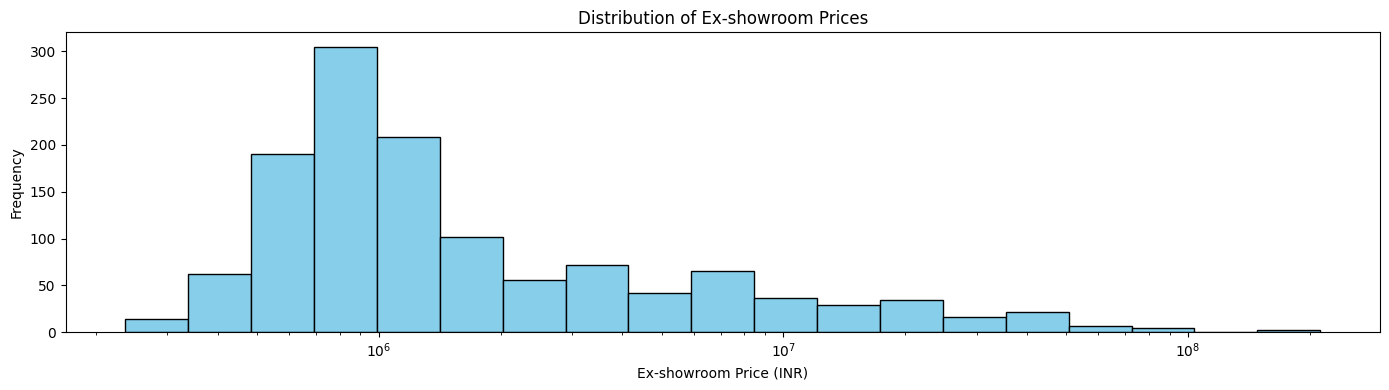

In [156]:

fig, ax = plt.subplots(figsize=(14, 4))

# Define the bins for the logarithmic scale histogram
log_bins = np.logspace(np.log10(data['Ex-Showroom_Price_INR'].min()), np.log10(data['Ex-Showroom_Price_INR'].max()), 20)

# Plot the histogram
ax.hist(data['Ex-Showroom_Price_INR'], bins=log_bins, color='skyblue', edgecolor='black')

# Set the title and labels
ax.set_title('Distribution of Ex-showroom Prices')
ax.set_xlabel('Ex-showroom Price (INR)')
ax.set_ylabel('Frequency')

# Set the x-axis to a logarithmic scale
ax.set_xscale('log')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-160-5a52e82b5f9c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Fuel_Type',width = 0.5, order=data['Fuel_Type'].value_counts().index, palette='viridis', ax=axes[0])
<ipython-input-160-5a52e82b5f9c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_car, x='Body_Type', order=filtered_car['Body_Type'].value_counts().index, palette='viridis', ax=axes[1])


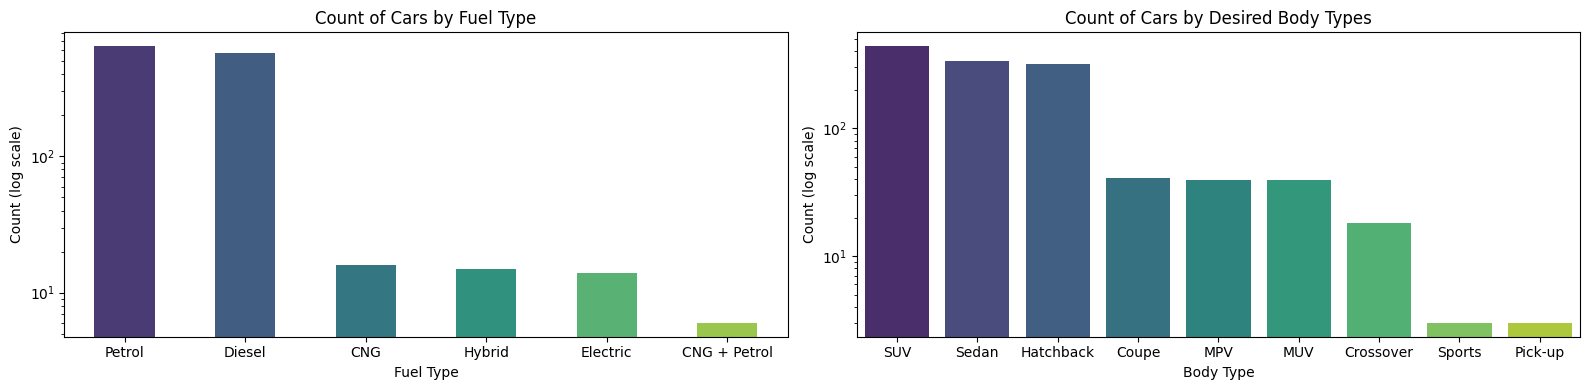

In [160]:
# Define the desired body types
desired_body_types = ['Coupe', 'Crossover', 'Hatchback', 'MPV', 'MUV', 'Pick-up', 'Sedan', 'Sports', 'SUV']

# Filter the DataFrame to include only the desired body types
filtered_car = data[data['Body_Type'].isin(desired_body_types)]

# Create side-by-side bar charts for fuel type and body type distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Bar chart for fuel type distribution
sns.countplot(data=data, x='Fuel_Type',width = 0.5, order=data['Fuel_Type'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Count of Cars by Fuel Type')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count (log scale)')

# Bar chart for filtered body type distribution
sns.countplot(data=filtered_car, x='Body_Type', order=filtered_car['Body_Type'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Count of Cars by Desired Body Types')
axes[1].set_xlabel('Body Type')
axes[1].set_ylabel('Count (log scale)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

By graph Petrol is most commonly used and in body type SUV followed by sedan etc

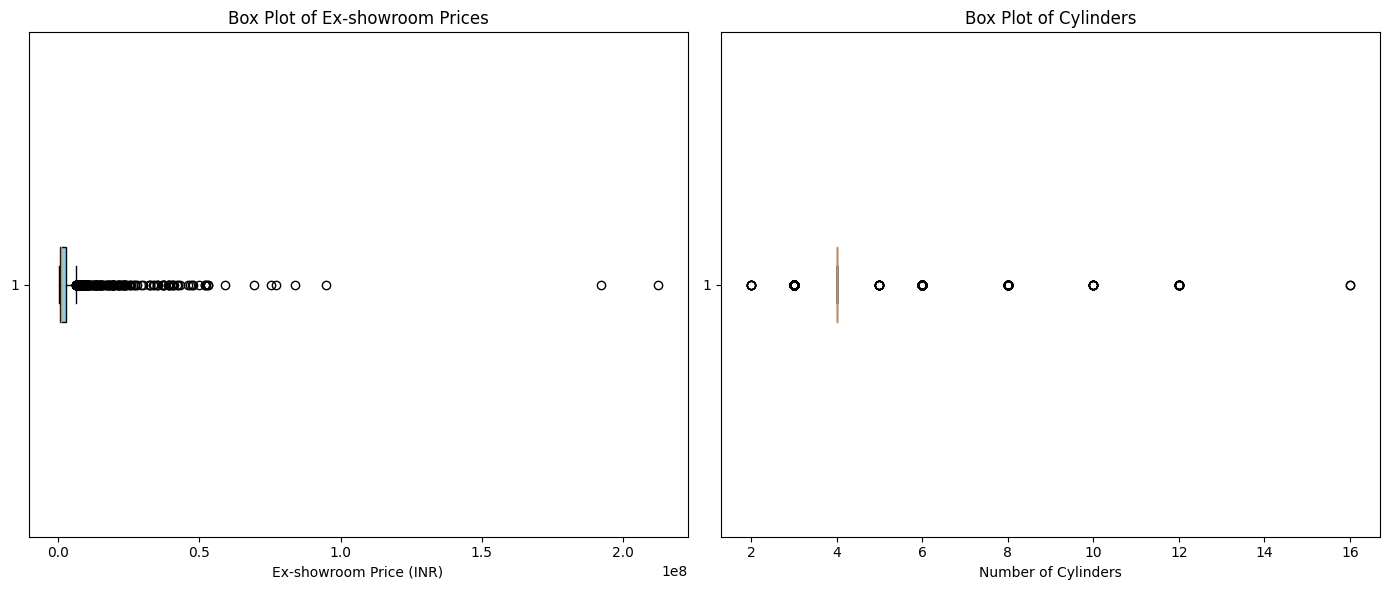

In [161]:


# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for 'Ex-Showroom_Price_INR'
axes[0].boxplot(data['Ex-Showroom_Price_INR'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axes[0].set_title('Box Plot of Ex-showroom Prices')
axes[0].set_xlabel('Ex-showroom Price (INR)')

# Box plot for 'Cylinders'
axes[1].boxplot(data['Cylinders'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Box Plot of Cylinders')
axes[1].set_xlabel('Number of Cylinders')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


car price has high outliers


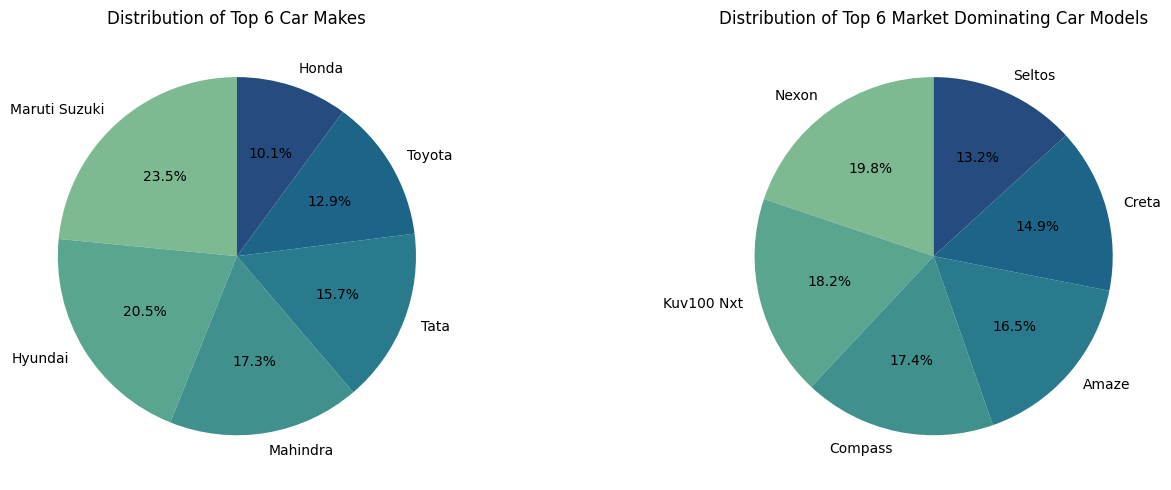

In [163]:
top_makes = data['Make'].value_counts().head(6)
top_models = data['Model'].value_counts().head(6)

# Create a 1x2 matrix of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the pie chart for top makes in the first subplot (axes[0])
axes[0].pie(top_makes, labels=top_makes.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('crest'))
axes[0].set_title('Distribution of Top 6 Car Makes')

# Plot the pie chart for top models in the second subplot (axes[1])
axes[1].pie(top_models, labels=top_models.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('crest'))
axes[1].set_title('Distribution of Top 6 Market Dominating Car Models')

# Adjust layout for better spacing
plt.tight_layout()



Represents Maruthi SUzuki is leading car Make and nexon is dominating car model

In [168]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 0 to 1275
Data columns (total 121 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Make                                       object 
 1    Model                                      object 
 2    Variant                                    object 
 3    Ex-Showroom_Price_INR                      int64  
 4    Displacement_cc                            float64
 5    Cylinders                                  float64
 6    Valves_Per_Cylinder                        float64
 7    Drivetrain                                 object 
 8    Cylinder_Configuration                     object 
 9    Emission_Norm                              object 
 10   Engine_Location                            object 
 11   Fuel_System                                object 
 12   Fuel_Tank_Capacity_L                       float64
 13   Fuel_Type                           

In [169]:
dimension_subset = data[['Height', 'Length', 'Width', 'Kerb_Weight', 'Ground_Clearance']].corr()

# Display the correlation matrix
dimension_subset

,Height,Length,Width,Kerb_Weight,Ground_Clearance
Height,1.000000,0.144848,0.196823,-0.042642,0.205660
Length,0.144848,1.000000,0.756779,-0.061584,0.166780
Width,0.196823,0.756779,1.000000,-0.058325,0.289172
Kerb_Weight,-0.042642,-0.061584,-0.058325,1.000000,-0.012179
Ground_Clearance,0.205660,0.166780,0.289172,-0.012179,1.000000


In [171]:
correlation_matrix_power_torque = data[['Power_RPM', 'Power_PS', 'Torque_RPM', 'Torque_Nm']].corr()

# Display the correlation matrix
correlation_matrix_power_torque

,Power_RPM,Power_PS,Torque_RPM,Torque_Nm
Power_RPM,1.000000,0.063557,0.280620,-0.066438
Power_PS,0.063557,1.000000,0.244584,0.855400
Torque_RPM,0.280620,0.244584,1.000000,-0.069766
Torque_Nm,-0.066438,0.855400,-0.069766,1.000000


<ipython-input-176-4a156daaaeb6>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Make', y='Ex-Showroom_Price_INR', data=data, palette='viridis', ax=axs[0]) # Use a single index to access the axes


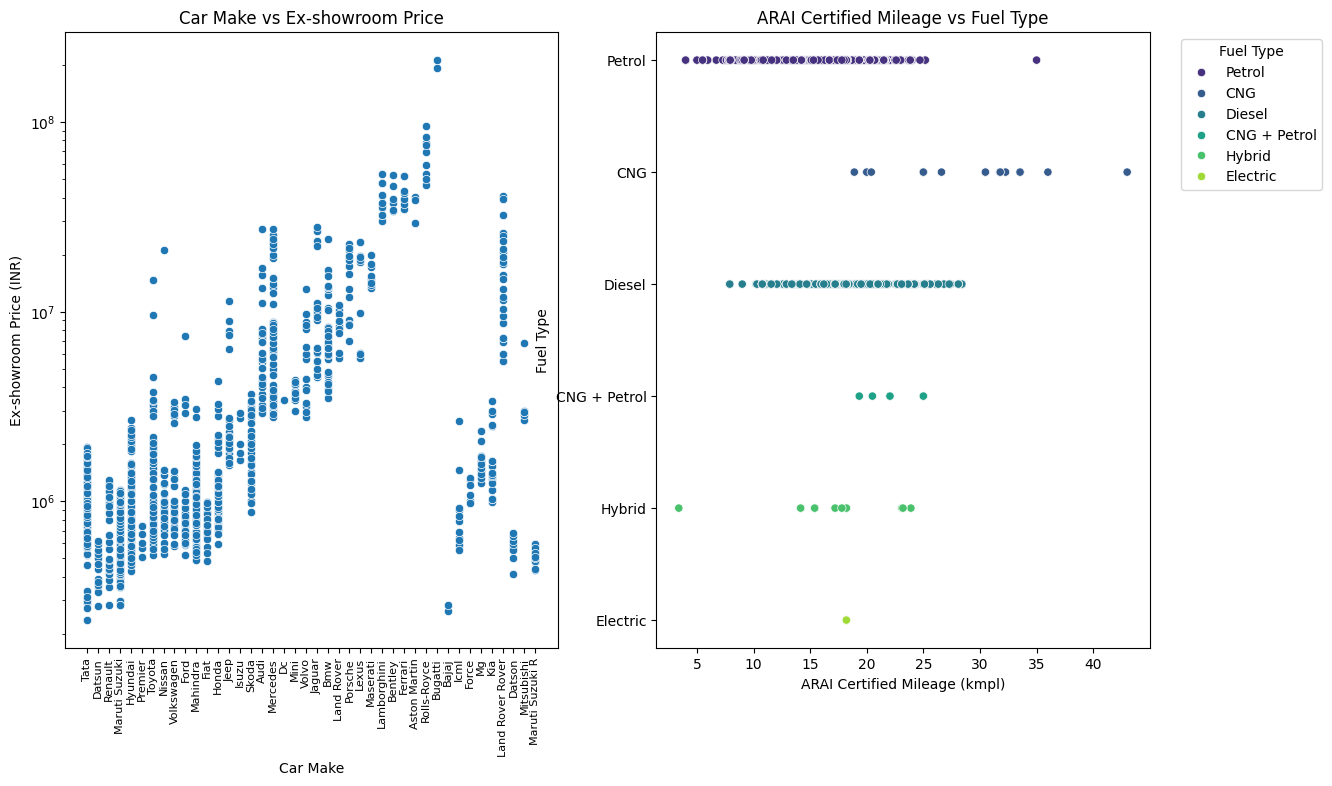

In [176]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Scatter plot between car make and ex-showroom price
sns.scatterplot(x='Make', y='Ex-Showroom_Price_INR', data=data, palette='viridis', ax=axs[0]) # Use a single index to access the axes
axs[0].set_title('Car Make vs Ex-showroom Price')
axs[0].set_xlabel('Car Make')
axs[0].set_ylabel('Ex-showroom Price (INR)')
axs[0].set_yscale('log')
axs[0].tick_params(axis='x', rotation=90,labelsize=8)

# Scatter plot between ARAI certified mileage and fuel type
sns.scatterplot(x= 'ARAI_Certified_Mileage_KMPL', y='Fuel_Type', data=data, hue='Fuel_Type', palette='viridis', ax=axs[1]) # Use a single index to access the axes
axs[1].set_title('ARAI Certified Mileage vs Fuel Type')
axs[1].set_xlabel('ARAI Certified Mileage (kmpl)')
axs[1].set_ylabel('Fuel Type')
axs[1].legend(title='Fuel Type', bbox_to_anchor=(1.05, 1))

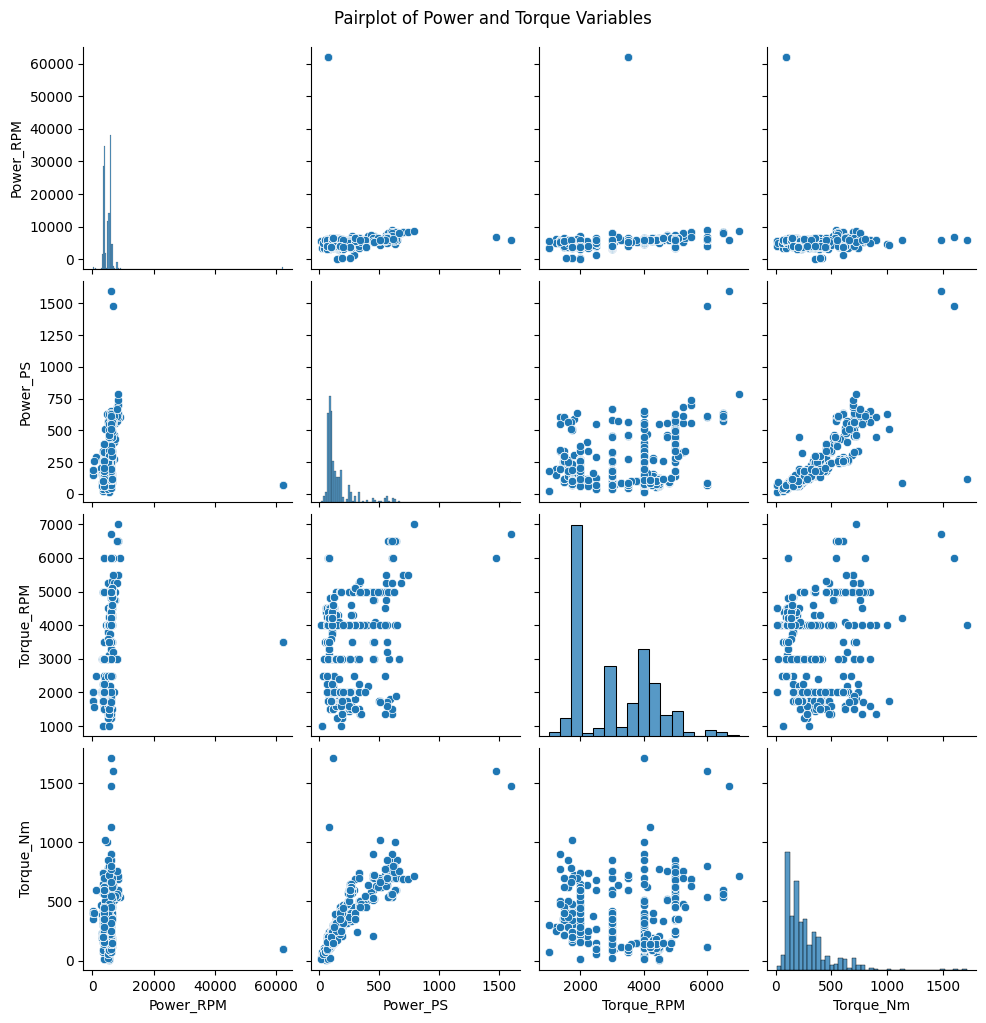

In [177]:
selected_power_torque_variables = ['Power_RPM', 'Power_PS', 'Torque_RPM', 'Torque_Nm']

# Pairplot for selected power and torque variables
sns.pairplot(data[selected_power_torque_variables])
plt.suptitle('Pairplot of Power and Torque Variables', y=1.02)
plt.show()

<ipython-input-178-c9504520acd2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=data, x='Fuel_Type', y='ARAI_Certified_Mileage_KMPL', hue='Fuel_Type', ci=False, palette='viridis', dodge=False, order=sorted_data, width=0.5)


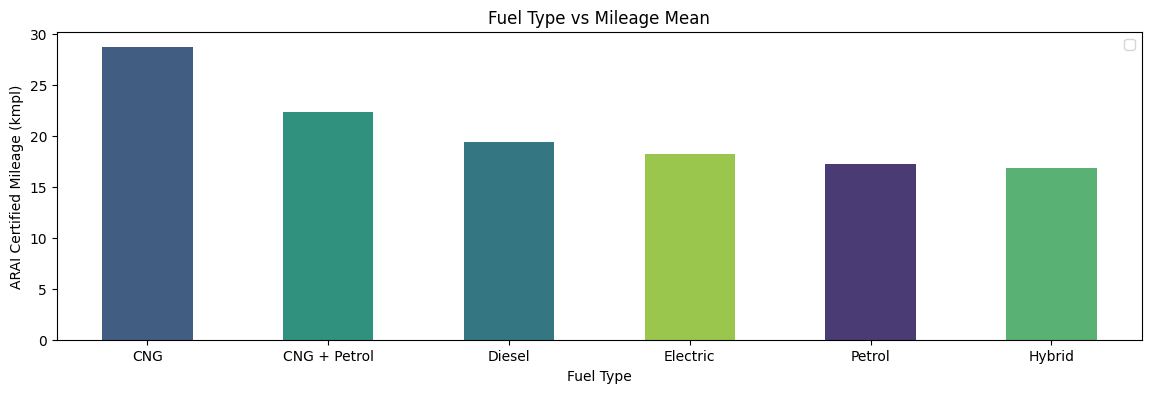

In [178]:
sorted_data = data.groupby('Fuel_Type')['ARAI_Certified_Mileage_KMPL'].mean().sort_values(ascending=False).index

# Bar chart with hue for Fuel Type vs Mileage mean
plt.figure(figsize=(14, 4))
sns.barplot(data=data, x='Fuel_Type', y='ARAI_Certified_Mileage_KMPL', hue='Fuel_Type', ci=False, palette='viridis', dodge=False, order=sorted_data, width=0.5)
plt.title('Fuel Type vs Mileage Mean')
plt.xlabel('Fuel Type')
plt.ylabel('ARAI Certified Mileage (kmpl)')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.show()

It is necessary to buy CNG **cars**

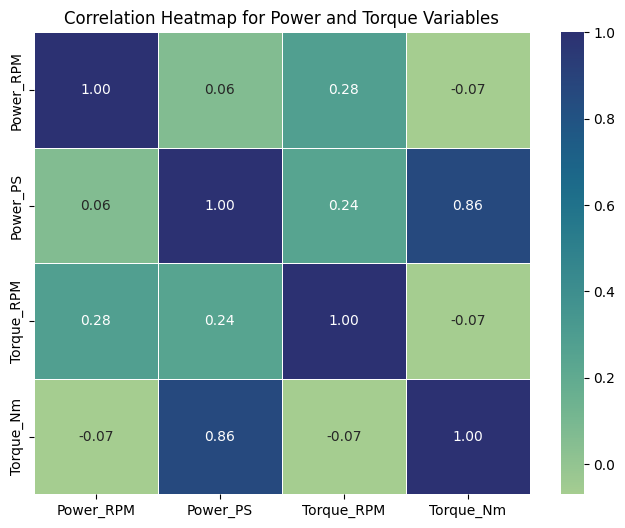

In [179]:
correlation_matrix_power_torque = data[['Power_RPM', 'Power_PS', 'Torque_RPM', 'Torque_Nm']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_power_torque, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Power and Torque Variables')
plt.show()

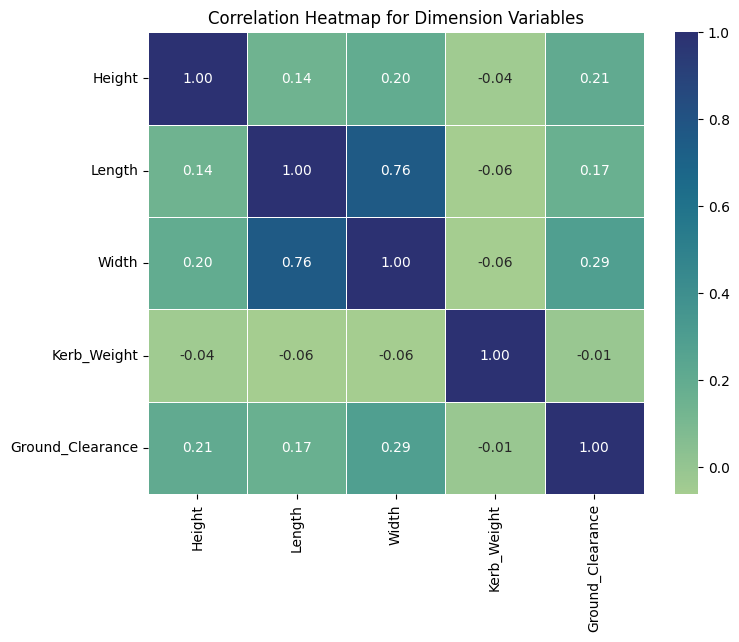

In [181]:
dimension_subset = data[['Height', 'Length', 'Width', 'Kerb_Weight', 'Ground_Clearance']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dimension_subset, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Dimension Variables')
plt.show()

<Figure size 1200x800 with 0 Axes>

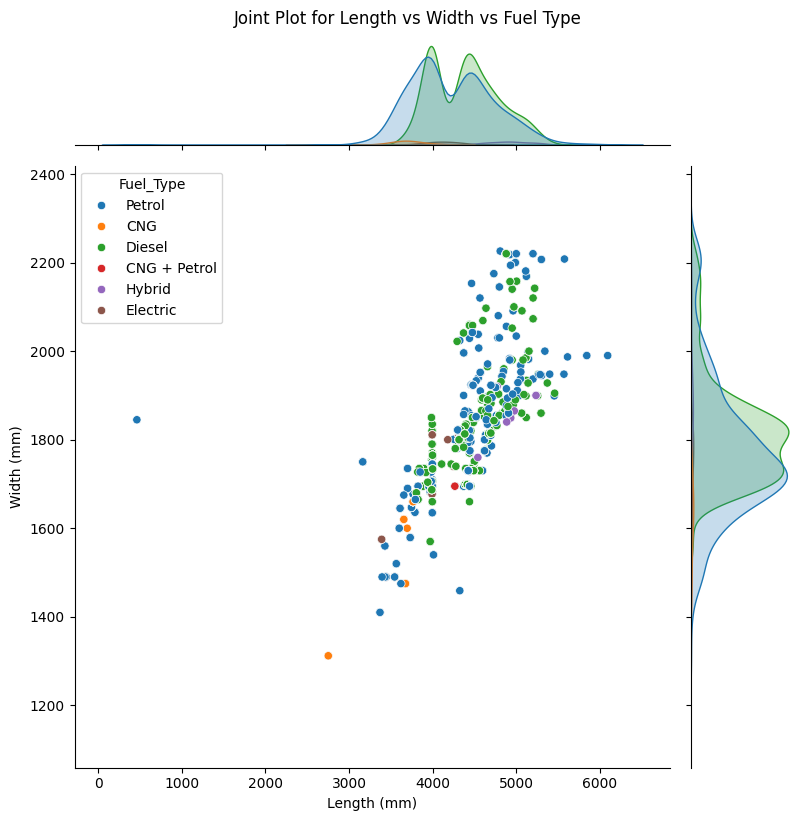

In [182]:
plt.figure(figsize=(12, 8))

joint_plot = sns.jointplot(data=data, x='Length', y='Width', hue='Fuel_Type', height=8)
joint_plot.set_axis_labels('Length (mm)', 'Width (mm)')
joint_plot.fig.suptitle('Joint Plot for Length vs Width vs Fuel Type', y=1.02)
plt.show()

<ipython-input-189-4f34bc1fc126>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Doors', palette='viridis', order=data['Doors'].value_counts().sort_values(ascending=False).index, width=0.5, ax=axes[1]) # Changed axes[0, 1] to axes[1]
<ipython-input-189-4f34bc1fc126>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gears', palette='viridis', order=data['Gears'].value_counts().sort_values(ascending=False).index, width=0.5, ax=axes[0]) # Changed axes[1, 0] to axes[0]


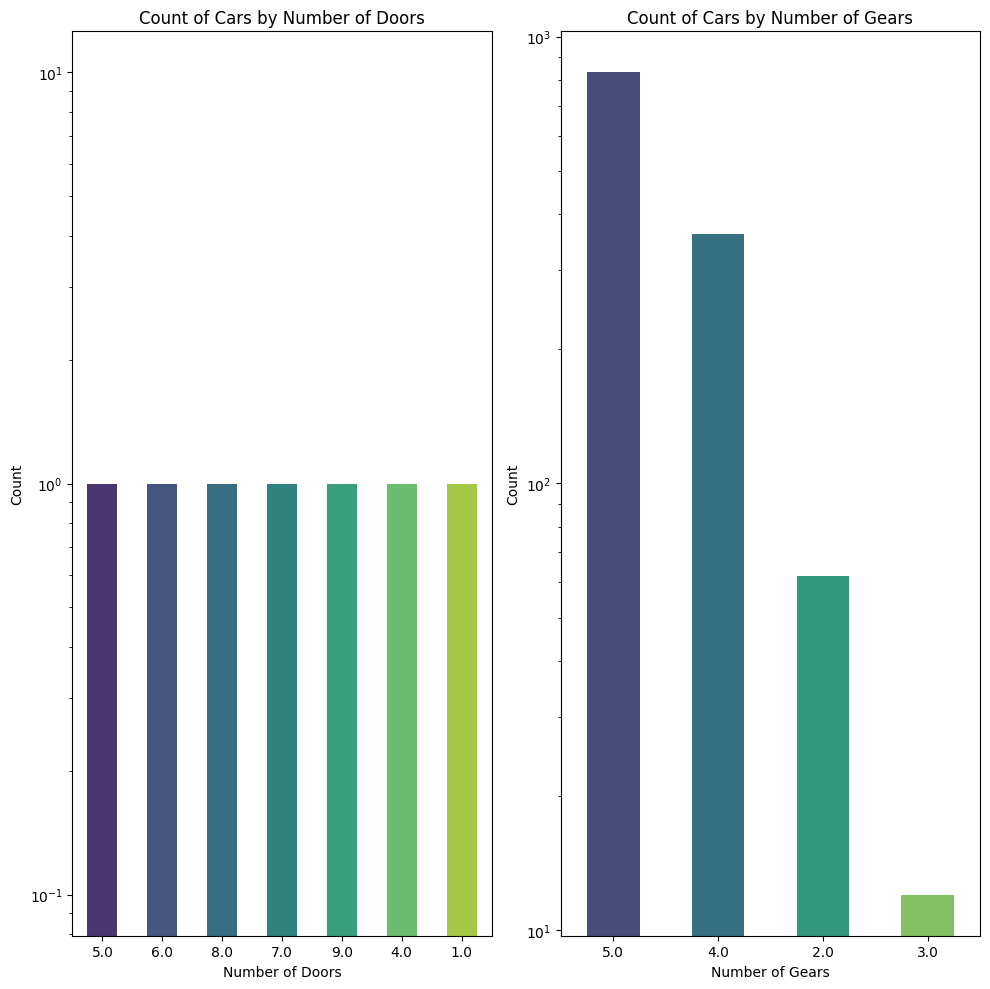

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
sns.countplot(data=data, x='Doors', palette='viridis', order=data['Doors'].value_counts().sort_values(ascending=False).index, width=0.5, ax=axes[1])
axes[0].set_title('Count of Cars by Number of Doors')
axes[0].set_xlabel('Number of Doors')
axes[0].set_ylabel('Count')
axes[0].set_yscale('log')

# Plot 3: Gears
sns.countplot(data=data, x='Gears', palette='viridis', order=data['Gears'].value_counts().sort_values(ascending=False).index, width=0.5, ax=axes[0]) # Changed axes[1, 0] to axes[0]
axes[1].set_title('Count of Cars by Number of Gears')
axes[1].set_ylabel('Count')
axes[1].set_yscale('log')
plt.tight_layout()
plt.show()

<ipython-input-190-b1a4811d28f7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_5_car_makes_data, x='Make', y='ARAI_Certified_Mileage_KMPL', palette='viridis')


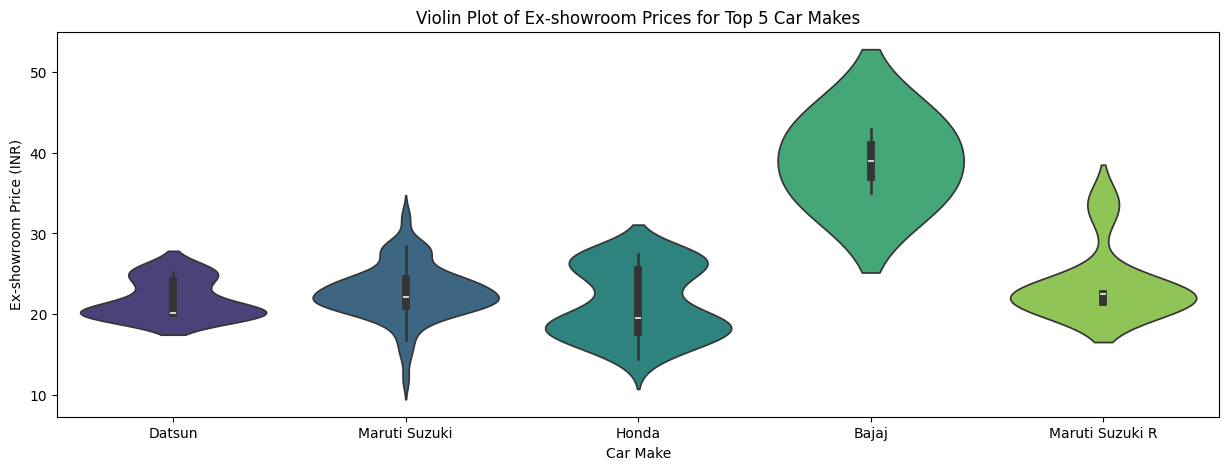

In [190]:
top_5_makes = data.groupby('Make')['ARAI_Certified_Mileage_KMPL'].mean().sort_values(ascending=False).head(5).index

# Filter the dataset for the top 5 makes
top_5_car_makes_data = data[data['Make'].isin(top_5_makes)]

# Create a Violin Plot with y-axis limit
plt.figure(figsize=(15, 5))
sns.violinplot(data=top_5_car_makes_data, x='Make', y='ARAI_Certified_Mileage_KMPL', palette='viridis')
plt.title('Violin Plot of Ex-showroom Prices for Top 5 Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Ex-showroom Price (INR)')
plt.show()

In [193]:
filtered_car = data[data['Cylinder_Configuration'] != 'Not Mentioned']



# Sort fuel types in descending order
sorted_fuel_types = sorted(filtered_car['Fuel_Type'].unique(), reverse=True)

# Create a stacked bar chart for Fuel Type vs Cylinder using Plotly
fig = px.histogram(filtered_car, x='Fuel_Type', color='Cylinder_Configuration', barmode='stack',
                   category_orders={'Fuel_Type': sorted_fuel_types},
                   labels={'Fuel_Type': 'Fuel Type', 'Cylinder_Configuration': 'Cylinder Configuration'},
                   title='Fuel Type Distribution by Cylinder Configuration')


fig.update_layout(xaxis_title='Fuel Type', yaxis_title='Count (log scale)', legend_title='Cylinder Configuration', yaxis_type="log")
# Sort bars in decreasing order
fig.update_xaxes(categoryorder='total descending')

fig.show()

petorl runs on all type of cylinders
